In [1]:
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy

import geometrik.threed as g3d

import goto.globe
from goto.globe.blip import Blip
from goto.globe.plot import GlobePlotMpl

In [2]:
BOD = Blip(44.828333, -0.715556).as_vector
MXP = Blip(45.63, 8.723056).as_vector
MRS = Blip(43.436667, 5.215).as_vector
LHR = Blip(51.4775, -0.461389).as_vector
LIS = Blip(38.774167, -9.134167).as_vector
RKV = Blip(64.13, -21.940556).as_vector
SYD = Blip(-33.946111, 151.177222).as_vector
PRY = Blip(-25.653611, 28.224167).as_vector
SVO = Blip(55.972778, 37.414722).as_vector
SIN = Blip(1.359167, 103.989444).as_vector

In [3]:
def wsk_arc_radius_to_aperture(Ax, Bx, r) :
    a_mini = Ax.angle_to(Bx) / 2.0
    print("a_mini = ", a_mini)
    a_maxi = math.pi / 2.0
    a_abs = abs(r / goto.globe.earth_radius)
    print("a_abs = ", a_abs)
    a_bounded = max(a_mini, min(a_abs, a_maxi))
    print("a_bounded = ", a_bounded)

    return math.copysign(a_bounded, r)

def wsk_arc_def(Ax, Bx, radius, is_large_arc=False) :
    w = math.copysign(1.0, radius)
    k = -1.0 if is_large_arc else 1.0
    


    aperture = wsk_arc_radius_to_aperture(Ax, Bx, radius)
    print("aperture =", aperture)
    
    Qx = (Ax + Bx).normalized()
    Qy = (Bx @ Ax).normalized() * w
    Qz = Qx @ Qy
    
    deflection = math.acos(min((math.cos(aperture) / (Ax * Qx)), math.pi / 2.0)) * k
    print("deflection =", deflection)
    Cx = g3d.Vector.compose(Qx, Qy, deflection)
    Cz = (Cx @ Ax).normalized()
    Cy = Cz @ Cx

    Az = w * (Ax @ Cx).normalized()
    Ay = w * (Cx @ Az)

    Bz = w * (Bx @ Cx).normalized()
    By = w * (Cx @ Bz)
    
    with GlobePlotMpl() as plt :
        plt.add_point(Ax, "Ax", "r")
        plt.add_point(Ay, "Ay", "g")
        plt.add_point(Az, "Az", "b")
        plt.add_point(Bx, "Bx", "magenta")
        plt.add_point(By, "By", "yellow")
        plt.add_point(Bz, "Bz", "cyan")
        plt.add_point(Cx, "Cx", "k")
        plt.add_signed_arc(Ax, Bx, Cx, w)
    
    return 


    with GlobePlotMpl() as plt :
        plt.add_point(Ax, "Ax", "orange")
        plt.add_point(Bx, "Bx", "cyan")
        plt.add_point(Qx, "Qx", "r")
        plt.add_point(Qy, "Qy", "g")
        plt.add_point(Qz, "Qz", "b")
        plt.add_point(Cx, "Cx", "magenta")
        plt.add_point(Cy, "Cy", "purple")
        plt.add_point(Cz, "Cz", "k")
        plt.add_signed_arc(Ax, Bx, Cx, w)


a_mini =  0.30551691249071183
a_abs =  0.3924025361921824
a_bounded =  0.3924025361921824
aperture = 0.3924025361921824
deflection = 0.2502146301285941


<IPython.core.display.Javascript object>


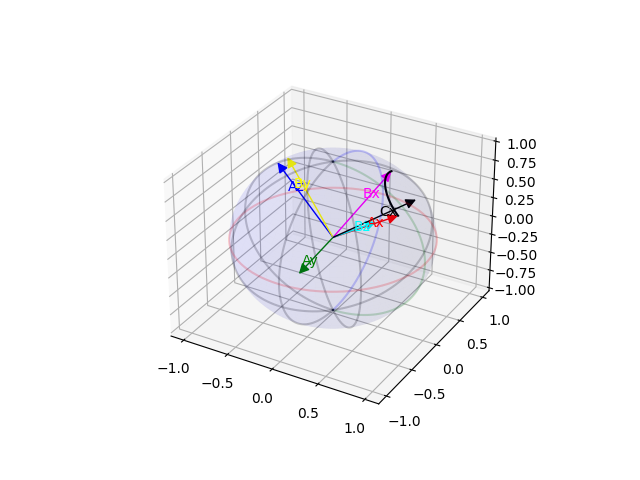

103.72951618906252
103.72951618906252


In [4]:
Ax, Bx = LIS, SVO

wsk_arc_def(Ax, Bx, 2500000.0)

a_mini =  0.30551691249071183
a_abs =  0.3924025361921824
a_bounded =  0.3924025361921824
aperture = -0.3924025361921824
deflection = 0.2502146301285941


<IPython.core.display.Javascript object>


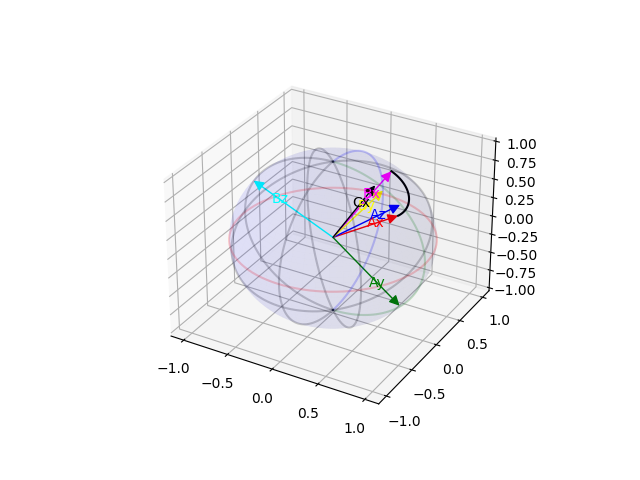

103.7295161890625
103.7295161890625


In [5]:
wsk_arc_def(Ax, Bx, -2500000.0)

a_mini =  0.30551691249071183
a_abs =  0.3924025361921824
a_bounded =  0.3924025361921824
aperture = 0.3924025361921824
deflection = -0.2502146301285941


<IPython.core.display.Javascript object>


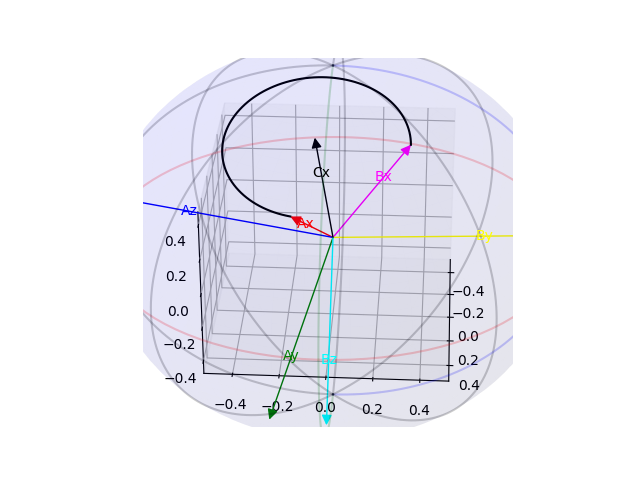

-103.7295161890625
256.2704838109375


In [7]:
wsk_arc_def(Ax, Bx, 2500000.0, True)

a_mini =  0.30551691249071183
a_abs =  0.3924025361921824
a_bounded =  0.3924025361921824
aperture = -0.3924025361921824
deflection = -0.2502146301285941


<IPython.core.display.Javascript object>


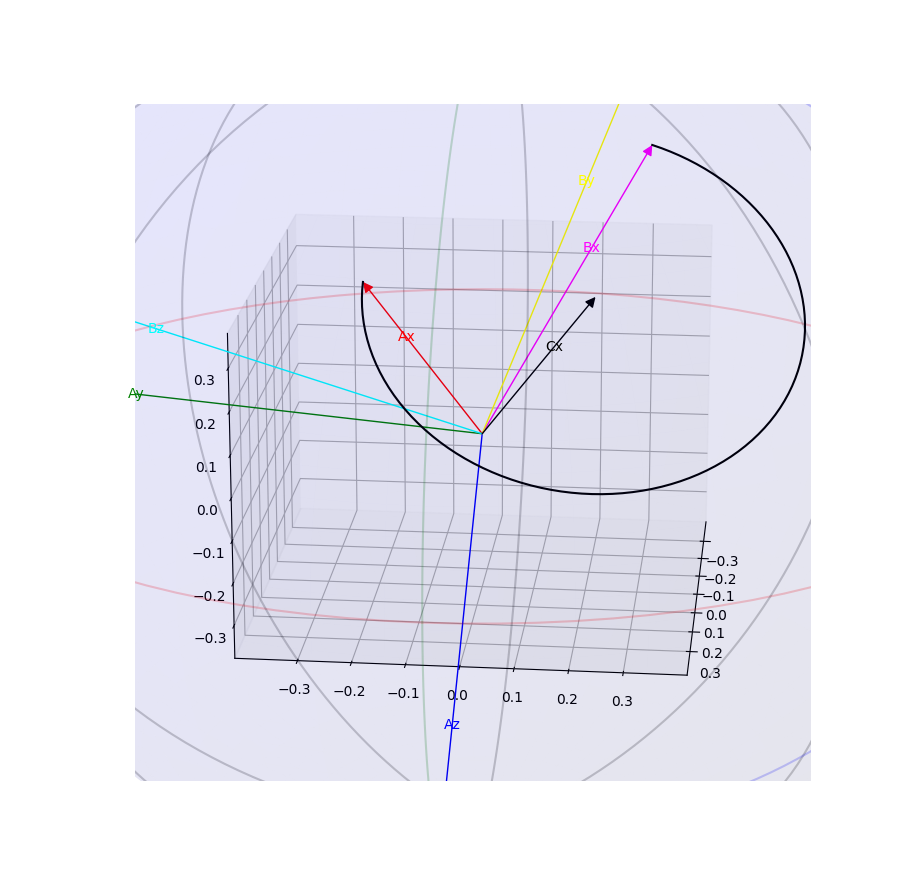

-103.72951618906252
256.2704838109375


In [8]:
wsk_arc_def(Ax, Bx, -2500000.0, True)

In [ ]:
radius_mini = Ax.angle_to(Bx) * goto.globe.earth_radius / 2
radius_maxi = goto.globe.earth_radius
radius_bounded = math.copysign(max(radius_mini, min(abs(radius), radius_maxi)), radius)
radius_mini, radius_bounded, radius_maxi

In [ ]:
Qx = (Ax + Bx).normalized()
Qy = (Bx @ Ax).normalized()

In [ ]:
goto.globe.earth_radius * 1e-17

In [ ]:
with GlobePlotMpl() as plt :
    plt.add_point(Ax, "Ax")
    plt.add_point(Bx, "Bx")
    plt.add_point(Qx, "Qx", "cyan")
    plt.add_point(Qy, "Qy", "magenta")